In [1]:
# This will clone and install the branch that has the current changes on it. If you want to see the output of the install to be sure it 
# was successfull, remove the > /dev/null 2>&1 in the second line.  

#!pip install -e astrohack/ > /dev/null 2>&1
#!pip install -e .. > /dev/null 2>&1

In [2]:
import os
import json
import astrohack

import numpy as np

import toolviper.utils.logger as logger

In [3]:
os.environ["PARAMETER_CONFIG_PATH"]

'/export/home/ajax/jhoskins/Development/toolviper-serial-logging/src/toolviper/config/:/export/home/ajax/jhoskins/Development/astrohack-development/src/astrohack/config/'

In [4]:
import distributed

from toolviper.dask.client import local_client

DEFAULT_DASK_ADDRESS="tcp://localhost:8786"

log_params = {
    'logger_name': "astrohack",
    'log_level':'DEBUG',
    'log_to_term':True,
    'log_to_file': False,
}

worker_log_params = {
    'logger_name': "astrohack",
    'log_level':'DEBUG',
    'log_to_term':True,
    'log_to_file': False,
    'log_file': None
}

client=local_client(
            cores=1,
            memory_limit='8GB',
            log_params=log_params,
            worker_log_params=worker_log_params,
            serial_execution=False
        )

#if not distributed.client._get_global_client():
#    try:
#        client = distributed.Client(DEFAULT_DASK_ADDRESS, timeout=2)
#        
#    except OSError:
#        print("Spawn client ...")
#        os.environ["DASK_SCHEDULER_ADDRESS"] = DEFAULT_DASK_ADDRESS
#        client=local_client(
#            cores=1,
#            memory_limit='8GB',
#            log_params=log_params,
#            worker_log_params=worker_log_params,
#            serial_execution=True
#        )
        
#else:
#    client = distributed.client._get_global_client()

#import dask
#dask.config.set(scheduler="synchronous")

[2024-03-04 09:41:48,930]     INFO  toolviper:  Checking parameter values for client.local_client 
[2024-03-04 09:41:48,931]     INFO  toolviper:  Module path: /export/home/ajax/jhoskins/Development/toolviper-serial-logging/ 
[2024-03-04 09:41:48,933]     INFO  toolviper:  Searching /export/home/ajax/jhoskins/Development/toolviper-serial-logging/src/toolviper/config/ for configuration file, please wait ... 
[2024-03-04 09:41:48,940]  WARNING   astrohack:  It is recommended that the local cache directory be set using the dask_local_dir parameter. 
[2024-03-04 09:41:50,367]    DEBUG   astrohack:  These are the worker log parameters:
 {'logger_name': 'astrohack', 'log_to_term': True, 'log_level': 'DEBUG', 'log_to_file': False, 'log_file': None}
[2024-03-04 09:41:50,377]    DEBUG   astrohack:  Loading plugin module: <class 'worker.DaskWorker'>
[2024-03-04 09:41:50,378]    DEBUG   astrohack:  worker
[2024-03-04 09:41:50,439]    DEBUG  astrohack_0:  Logger created on worker Worker-627276e4-0

In [5]:
client.dashboard_link

'http://127.0.0.1:8787/status'

In [6]:
#toolviper.utils.data.download('ea25_cal_small_before_fixed.split.ms', folder="data")

ms_file = "data/ea25_cal_small_before_fixed.split.ms"
'''
ms_file = "/export/home/ajax/jhoskins/Development/data/otf-47-ea06-spw0.ms"

point_name = "data/otf-47-ea06-spw0.point.zarr"
holog_name = "data/otf-47-ea06-spw0.holog.zarr"
image_name = "data/otf-47-ea06-spw0.image.zarr"
panel_name = "data/otf-47-ea06-spw0.panel.zarr"
'''
point_name = "data/ea25_cal_small_before_fixed.split.point.zarr"
holog_name = "data/ea25_cal_small_before_fixed.split.holog.zarr"
image_name = "data/ea25_cal_small_before_fixed.split.image.zarr"
panel_name = "data/ea25_cal_small_before_fixed.split.panel.zarr"

In [7]:
from astrohack.extract_pointing import extract_pointing

point_mds = extract_pointing(
    ms_name=ms_file,
    point_name=point_name,
    #exclude=["ea25"],
    parallel=True,
    overwrite=True
)

[2024-03-04 09:41:50,475]     INFO   astrohack:  Checking parameter values for extract_pointing.extract_pointing 
[2024-03-04 09:41:50,476]     INFO  toolviper:  Module path: /export/home/ajax/jhoskins/Development/astrohack-development/ 
[2024-03-04 09:41:50,478]     INFO   astrohack:  Searching /export/home/ajax/jhoskins/Development/toolviper-serial-logging/src/toolviper/config/ for configuration file, please wait ... 
[2024-03-04 09:41:50,479]     INFO   astrohack:  Searching /export/home/ajax/jhoskins/Development/astrohack-development/src/astrohack/config/ for configuration file, please wait ... 
[2024-03-04 09:41:50,483]  WARNING   astrohack:  data/ea25_cal_small_before_fixed.split.point.zarr will be overwritten. 
Successful readonly open of usernoread-locked table data/ea25_cal_small_before_fixed.split.ms/ANTENNA: 8 columns, 3 rows
[2024-03-04 09:41:55,488]    DEBUG  astrohack_0:  Writing pointing xds to data/ea25_cal_small_before_fixed.split.point.zarr/ant_ea25
[2024-03-04 09:41:

In [8]:
# Here I reduced the size of the holog_obs_dict for quicker testing. You can comment this out of edit it as needed depending on your testing goals.

from astrohack.extract_holog import generate_holog_obs_dict

holog_obs_dict = generate_holog_obs_dict(
    ms_name=ms_file,
    point_name="data/ea25_cal_small_before_fixed.split.point.zarr",
)

Successful readonly open of usernoread-locked table data/ea25_cal_small_before_fixed.split.ms/ANTENNA: 8 columns, 3 rows
Successful readonly open of usernoread-locked table data/ea25_cal_small_before_fixed.split.ms: 23 columns, 36580 rows
[2024-03-04 09:41:56,675]    DEBUG   astrohack:  
            ea04       ea06        ea25
ea04    0.000000  195.96687   45.062448
ea06  195.966870    0.00000  162.019850
ea25   45.062448  162.01985    0.000000
[2024-03-04 09:41:56,678]     INFO   astrohack:  Writing distance matrix to /export/home/ajax/jhoskins/Development/astrohack-development/examples/.baseline_distance_matrix.csv ... 


### The holog observations dictionary has now been turned into an extended dictionary object similar to the `holog_mds`. There are a couple of new functionalities available to the user now:

- The `select` function allows the user to trim the holog_obs_dict on all major axes (ddi, map, antenna, scan, baseline) in a much simpler way than previsouly.
- The `print` function allows the user to inspect the holog_obs_dict with both a static, ascii print out style and a dynamic, collapsible json style.
- A static method is available to allow the user to select the `n` closest baseline associated with a given mapping antenna adn return them in a list that cane be used with the baseline key option allowing the user to trim the holog_obs_dict based on baseline.

### Each of these options is demonstrated below.

In [9]:
#get_nearest_baselines(antenna="ea25", n_baselines=5)

In [10]:
# There are two options here for style, static and dynamic. Static returns a formatted ascii output while dynamic returns a dynamic json object.
holog_obs_dict.print(style="dynamic")

<IPython.core.display.JSON object>

In [11]:
from astrohack.extract_holog import model_memory_usage

memory_per_core = model_memory_usage(
    ms_name=ms_file, 
    holog_obs_dict=holog_obs_dict
)

model/elastic.model:   0%|          | 0.00/556 [00:00<?, ?iB/s]

/export/home/ajax/jhoskins/.conda/envs/python-3.10/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator ElasticNet from version 1.3.2 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


                                      System Info                                       
┏━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ N-cores ┃ Available memory (MB) ┃ Total memory (MB) ┃ Suggested memory per core (MB) ┃
┡━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       4 │ 1814                  │ 15881             │                          11911 │
└─────────┴───────────────────────┴───────────────────┴────────────────────────────────┘
    Available memory: represents the system memory available without going into swap    

### `Select(key, value, inplace, **kwargs)`
### The select function allows the user to trim the `holog_obs_dict`. The `key` (ddi, map, antenna, scan, baseline) input gives the dictionary key you would like to select and `value` is the value you want to keep. Everything else is deleted. There is also an `inplace` boolean input. This specifies whether you want to modify the calling dictionay or return a new dictionary. The additional arguments, `kwarags` is currently only useful for the baseline example explain further down.

### One key feature is also that all select calls are chainable. This allows for selecting on mutiple keys in a simple modular way. An example is shown below.

In [12]:
# Select only ddi=0 and return a new dictionary, from the original dictionary above.
#trimmed_dict = holog_obs_dict.select(key="ddi", value=1, inplace=False)
#trimmed_dict.print(style="dynamic")

In [13]:
# Here we will select only following (key,value) pairs: 
#
# ddi=0
# map=0
# scans=6, 7, 8, 9, 10
# antenna='ea22', 'ea15', 'ea25'
#
# We do this using function chaining. Because each call returns a new object, another call can be directly invoked.

#trimmed_dict = holog_obs_dict.select(
#    key="ddi", 
#    value=0, 
#    inplace=False
#).select(
#    key="map", 
#    value=0, 
#    inplace=False
#).select(
#    key="scan", 
#    value=[6, 7, 8, 9, 10], 
#    inplace=False
#).select(
#    key="antenna", 
#    value=['ea22', 'ea15', 'ea25'], 
#    inplace=False
#)

#trimmed_dict.print(style="dynamic")

### `Select(...)` with the baseline option:

### In order to trim the dictionary based on the shortest baseline formed using a given mapping antenna we require the use of two functions. First we use the static method to get the reference antennas that for the `n` shortest baselines given and antenna.

In [14]:
# Since it doesn't modify the dictionary object, this can be called on the new returned dictionary or the original dictionary. The following 
# gives the antennas for the three shortest baselines formed with the mapping antenna, 'ea25'. Note these don't take into account whether the 
# antenna is reference or mapping, it only calculates the baseline lengths for reference.
#nearest_baselines = holog_obs_dict.get_nearest_baselines(antenna="ea15", n_baselines=24)
#nearest_baselines
#
#.select(
#    key="scan", 
#    value=[
#        6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
#        16, 17, 19, 20, 21, 22, 23, 24, 25, 
#        26, 27, 28, 29, 30, 35, 36, 37, 38, 
#        39, 40
#    ],
#    inplace=False
#)

In [15]:
# With the reference antenna list in-hand we can now trim the dictionary using the select method as follows
'''
trimmed_dict = {}

trimmed_dict = holog_obs_dict.select(
    key="ddi", 
    value=1,
    inplace=False
).select(
    key="baseline", 
    value="ea15", 
    n_baselines=3, 
    inplace=False
)

trimmed_dict.print(style="dynamic")
'''

'\ntrimmed_dict = {}\n\ntrimmed_dict = holog_obs_dict.select(\n    key="ddi", \n    value=1,\n    inplace=False\n).select(\n    key="baseline", \n    value="ea15", \n    n_baselines=3, \n    inplace=False\n)\n\ntrimmed_dict.print(style="dynamic")\n'

In [16]:
# You will notice that there is a warning thrown below regarding the mutliple values of cell size and pixel number found in the pointing file
# but suggested values are computed. They are NOT guarenteed to work though. For instance, below you will see the number of pixels is very small
# and if you use the resonably calculated pixle value suggested, you will get a singular matrix. There is still work to be done.

from astrohack.extract_holog import extract_holog

holog_mds = extract_holog(
    ms_name=ms_file,
    point_name="data/ea25_cal_small_before_fixed.split.point.zarr",
    #holog_name="data/otf33.holog.zarr",
    #holog_obs_dict=trimmed_dict,
    data_column='CORRECTED_DATA',
    parallel=True,
    overwrite=True
)

[2024-03-04 09:42:00,113]     INFO   astrohack:  Checking parameter values for extract_holog.extract_holog 
[2024-03-04 09:42:00,114]     INFO  toolviper:  Module path: /export/home/ajax/jhoskins/Development/astrohack-development/ 
[2024-03-04 09:42:00,116]     INFO   astrohack:  Searching /export/home/ajax/jhoskins/Development/toolviper-serial-logging/src/toolviper/config/ for configuration file, please wait ... 
[2024-03-04 09:42:00,117]     INFO   astrohack:  Searching /export/home/ajax/jhoskins/Development/astrohack-development/src/astrohack/config/ for configuration file, please wait ... 
[2024-03-04 09:42:00,128]     INFO   astrohack:  Creating output file name: data/ea25_cal_small_before_fixed.split.holog.zarr 
[2024-03-04 09:42:00,131]  WARNING   astrohack:  data/ea25_cal_small_before_fixed.split.holog.zarr will be overwritten. 
Successful readonly open of usernoread-locked table data/ea25_cal_small_before_fixed.split.ms/DATA_DESCRIPTION: 3 columns, 2 rows
Successful readonly o

In [17]:
from astrohack.holog import holog

image_mds = holog(
    holog_name="data/ea25_cal_small_before_fixed.split.holog.zarr",
    #grid_size=np.array([30, 30]),
    overwrite=True,
    parallel=True
)

[2024-03-04 09:42:15,435]     INFO   astrohack:  Checking parameter values for holog.holog 
[2024-03-04 09:42:15,438]     INFO  toolviper:  Module path: /export/home/ajax/jhoskins/Development/astrohack-development/ 
[2024-03-04 09:42:15,443]     INFO   astrohack:  Searching /export/home/ajax/jhoskins/Development/toolviper-serial-logging/src/toolviper/config/ for configuration file, please wait ... 
[2024-03-04 09:42:15,445]     INFO   astrohack:  Searching /export/home/ajax/jhoskins/Development/astrohack-development/src/astrohack/config/ for configuration file, please wait ... 
[2024-03-04 09:42:15,464]     INFO   astrohack:  Creating output file name: data/ea25_cal_small_before_fixed.split.image.zarr 
[2024-03-04 09:42:15,465]  WARNING   astrohack:  data/ea25_cal_small_before_fixed.split.image.zarr will be overwritten. 
[2024-03-04 09:42:15,502]     INFO   astrohack:  Cell size: [-0.00067907  0.00067907], Grid size [29 29] 
[2024-03-04 09:42:15,988]     INFO  astrohack_0:  Calculating

[2024-03-04 09:42:22,715]     INFO   astrohack:  Checking parameter values for mds.AstrohackImageFile.plot_apertures 
[2024-03-04 09:42:22,717]     INFO  toolviper:  Module path: /export/home/ajax/jhoskins/Development/astrohack-development/ 
[2024-03-04 09:42:22,717]     INFO   astrohack:  Searching /export/home/ajax/jhoskins/Development/toolviper-serial-logging/src/toolviper/config/ for configuration file, please wait ... 
[2024-03-04 09:42:22,718]     INFO   astrohack:  Searching /export/home/ajax/jhoskins/Development/astrohack-development/src/astrohack/config/ for configuration file, please wait ... 
[2024-03-04 09:42:22,728]     INFO   astrohack:  Searching /export/home/ajax/jhoskins/Development/astrohack-development/src/astrohack for vla.zarr, please wait ... 


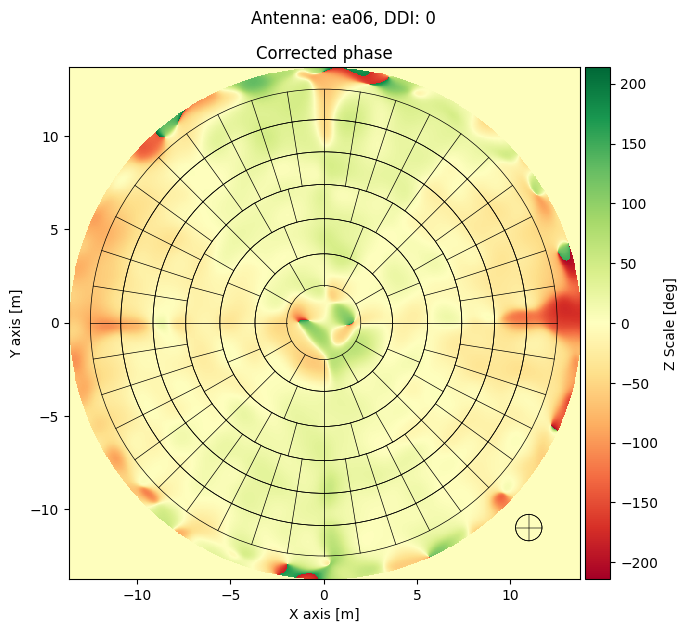

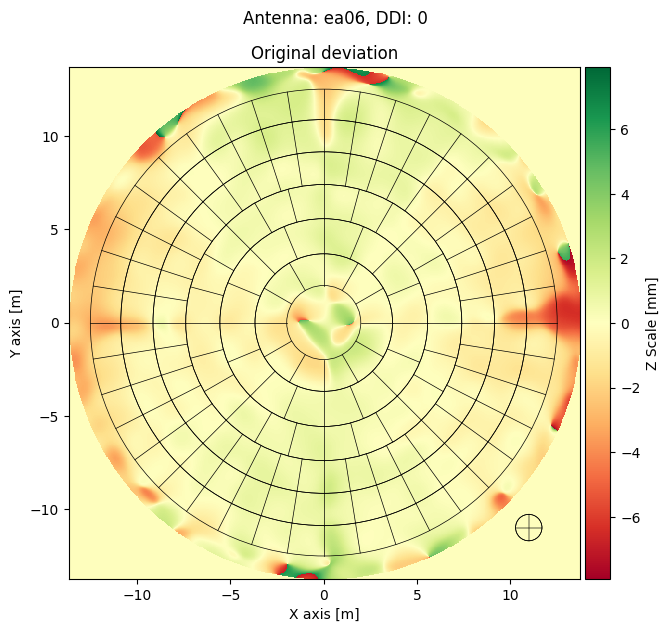

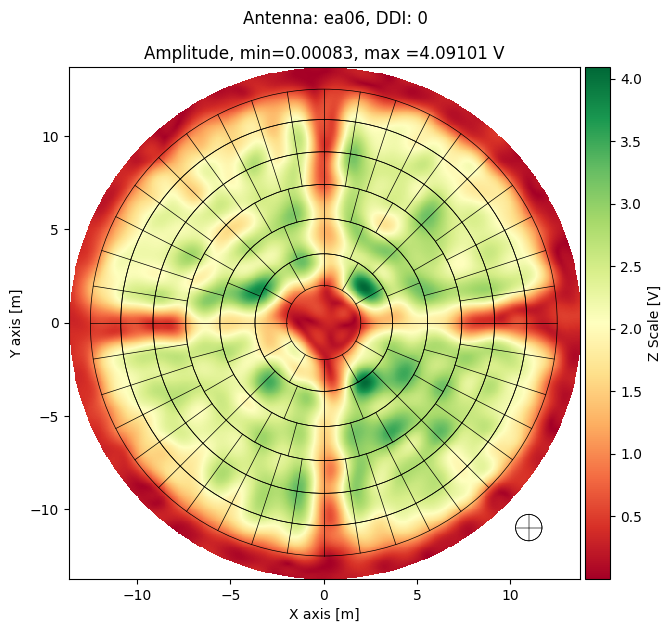

[2024-03-04 09:42:26,818]     INFO   astrohack:  Searching /export/home/ajax/jhoskins/Development/astrohack-development/src/astrohack for vla.zarr, please wait ... 


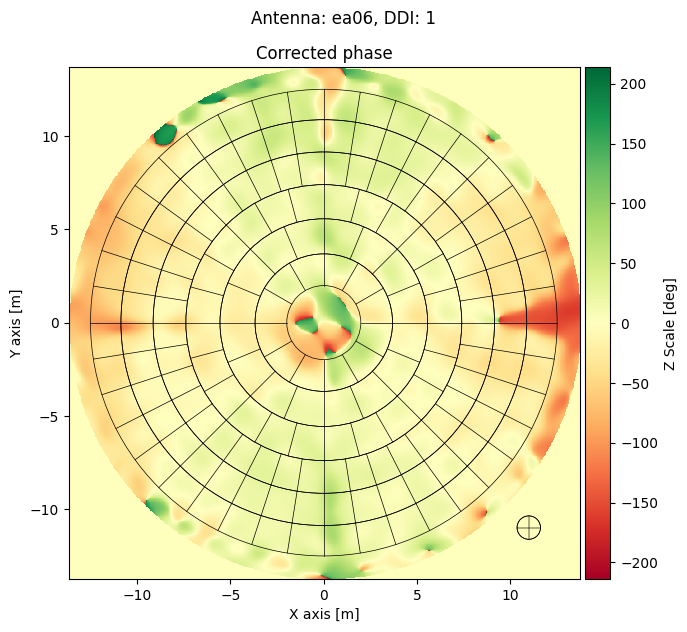

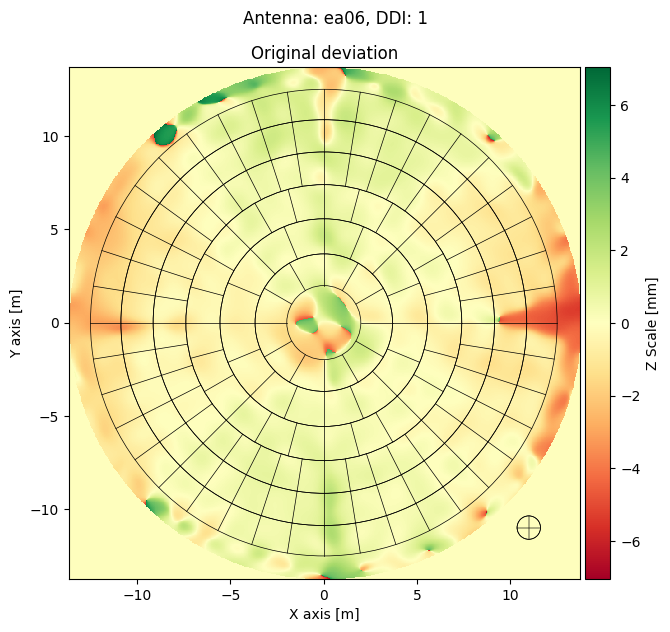

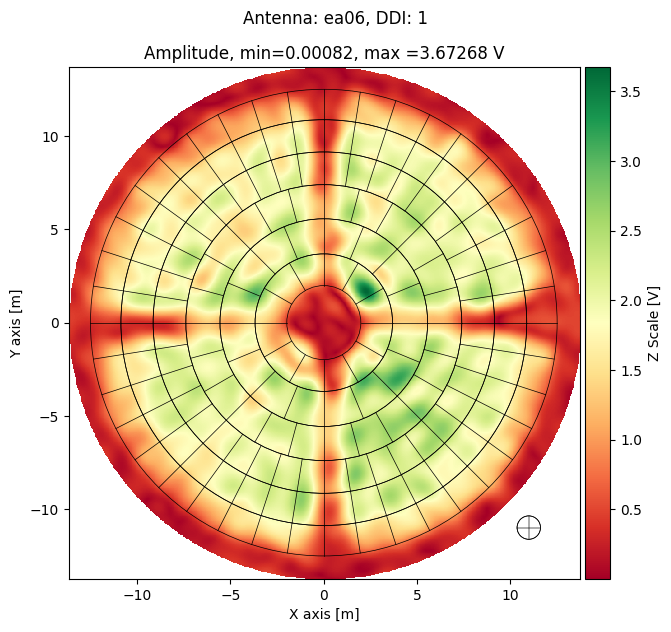

In [18]:
#
# A list of colormaps available in matplotlib can be found here:
#
# https://matplotlib.org/stable/users/explain/colors/colormaps.html
#

image_mds.plot_apertures(
    destination="plots", 
    ant="ea06",
    colormap="RdYlGn",
    display=True
)

In [19]:
from astrohack.panel import panel

panel_model = 'rigid'

panel_mds = panel(
    image_name=image_name,
    clip_type='absolute',
    clip_level=0.0,
    parallel=True,
    overwrite=True
)


[2024-03-04 09:42:30,605]     INFO   astrohack:  Checking parameter values for panel.panel 
[2024-03-04 09:42:30,607]     INFO  toolviper:  Module path: /export/home/ajax/jhoskins/Development/astrohack-development/ 
[2024-03-04 09:42:30,608]     INFO   astrohack:  Searching /export/home/ajax/jhoskins/Development/toolviper-serial-logging/src/toolviper/config/ for configuration file, please wait ... 
[2024-03-04 09:42:30,608]     INFO   astrohack:  Searching /export/home/ajax/jhoskins/Development/astrohack-development/src/astrohack/config/ for configuration file, please wait ... 
[2024-03-04 09:42:30,618]     INFO   astrohack:  Creating output file name: data/ea25_cal_small_before_fixed.split.panel.zarr 
[2024-03-04 09:42:30,664]  WARNING   astrohack:  data/ea25_cal_small_before_fixed.split.panel.zarr will be overwritten. 
[2024-03-04 09:42:31,023]     INFO  astrohack_0:  processing ant_ea06 ddi_0 
[2024-03-04 09:42:31,024]     INFO  astrohack_0:  Searching /export/home/ajax/jhoskins/Dev

[2024-03-04 09:42:54,815]     INFO   astrohack:  Checking parameter values for mds.AstrohackPanelFile.plot_antennas 
[2024-03-04 09:42:54,817]     INFO  toolviper:  Module path: /export/home/ajax/jhoskins/Development/astrohack-development/ 
[2024-03-04 09:42:54,818]     INFO   astrohack:  Searching /export/home/ajax/jhoskins/Development/toolviper-serial-logging/src/toolviper/config/ for configuration file, please wait ... 
[2024-03-04 09:42:54,820]     INFO   astrohack:  Searching /export/home/ajax/jhoskins/Development/astrohack-development/src/astrohack/config/ for configuration file, please wait ... 
[2024-03-04 09:42:54,829]     INFO   astrohack:  Searching /export/home/ajax/jhoskins/Development/astrohack-development/src/astrohack for vla.zarr, please wait ... 


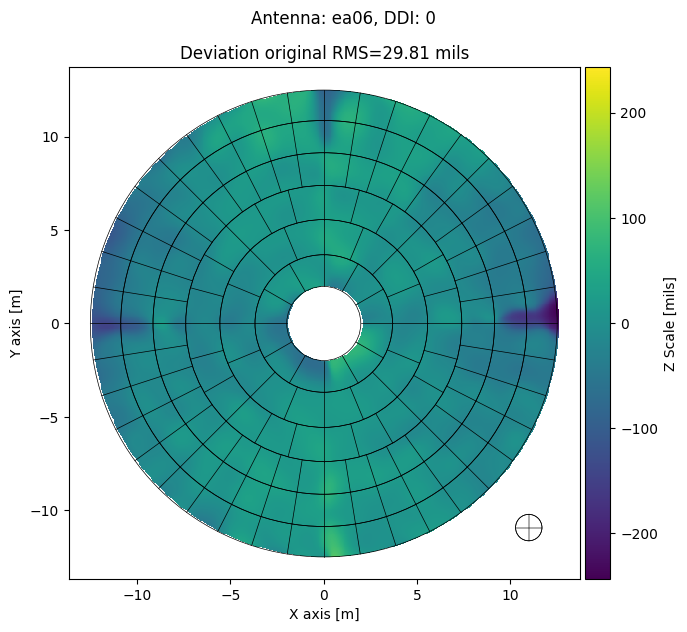

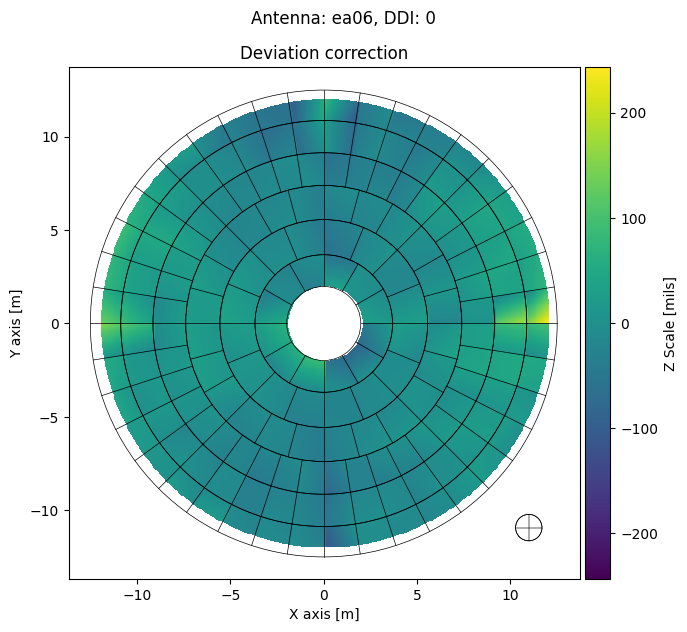

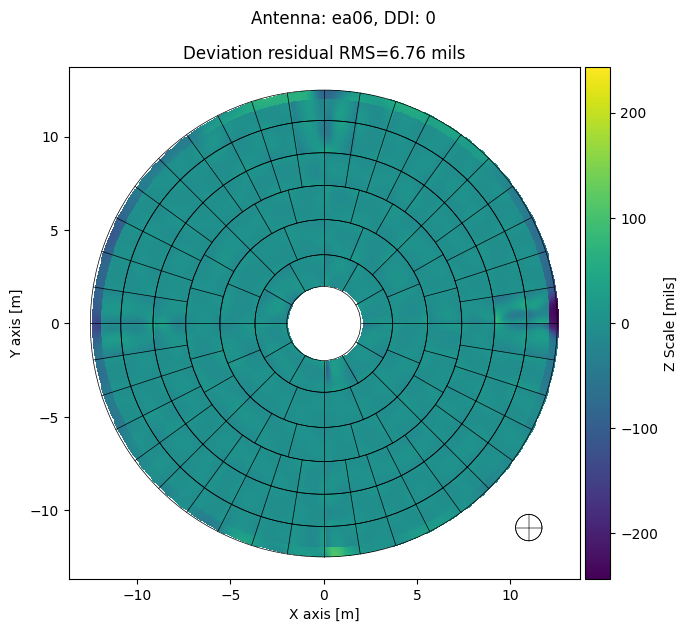

In [21]:
panel_mds.plot_antennas(
    "panel_exports",         # Directory to contain the plot and text file
    ant='ea06',              # Plotting Antenna ea06
    ddi=0,                   # Plotting DDI 0
    plot_type='deviation',   # Do deviation plots only
    deviation_unit='mils',   #
    plot_screws=False,       # Not plotting screw positions
    parallel=False,          # Don't do plots in parallel
    display=True             # Display plots below
)

In [22]:
client.shutdown()